In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hospital_readmissions.csv")

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:

df.shape

(25000, 17)

In [27]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [29]:
df.isnull().any()

age                  False
time_in_hospital     False
n_lab_procedures     False
n_procedures         False
n_medications        False
n_outpatient         False
n_inpatient          False
n_emergency          False
medical_specialty    False
diag_1               False
diag_2               False
diag_3               False
glucose_test         False
A1Ctest              False
change               False
diabetes_med         False
readmitted           False
dtype: bool

In [11]:
# Replace 'Yes' with 1 and 'No' with 0
df.replace({'yes': 1, 'no': 0}, inplace=True)

C:\Users\lsrin\AppData\Local\Temp\ipykernel_16168\3735779198.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


In [31]:
df[["glucose_test","A1Ctest"]] = df[["glucose_test","A1Ctest"]].astype('str')

In [33]:
categorical_columns = df.select_dtypes(include=["object"]).columns

In [35]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,0,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,0,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,0,0,1,0


In [37]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
ordinal_cols = encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = ordinal_cols

In [39]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3.0,8,72,1,18,2,0,0,4.0,0.0,7.0,6.0,0.0,0.0,0,1,0
1,3.0,3,34,2,13,0,0,0,5.0,6.0,6.0,6.0,0.0,0.0,0,1,0
2,1.0,5,45,0,18,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,3.0,2,36,0,12,1,0,0,4.0,0.0,6.0,1.0,0.0,0.0,1,1,1
4,2.0,1,42,0,7,0,0,0,3.0,6.0,0.0,7.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4.0,14,77,1,30,0,0,0,4.0,0.0,6.0,0.0,0.0,2.0,0,0,1
24996,4.0,2,66,0,24,0,0,0,4.0,2.0,3.0,6.0,0.0,1.0,1,1,1
24997,3.0,5,12,0,6,0,1,0,4.0,6.0,6.0,6.0,2.0,0.0,0,0,1
24998,3.0,2,61,3,15,0,0,0,2.0,7.0,1.0,6.0,0.0,0.0,1,1,0


<Axes: xlabel='age', ylabel='readmitted'>

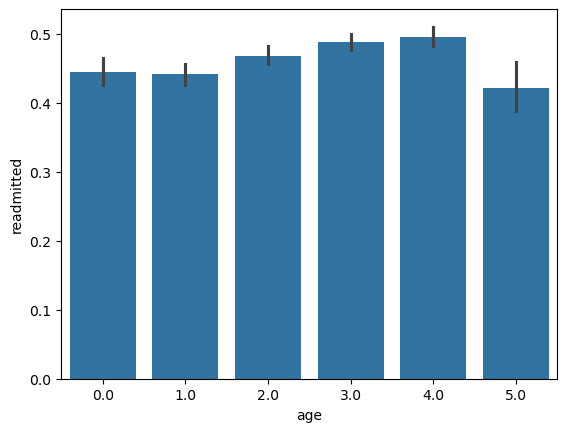

In [41]:
sns.barplot(x= df["age"], y = df["readmitted"])

<Axes: >

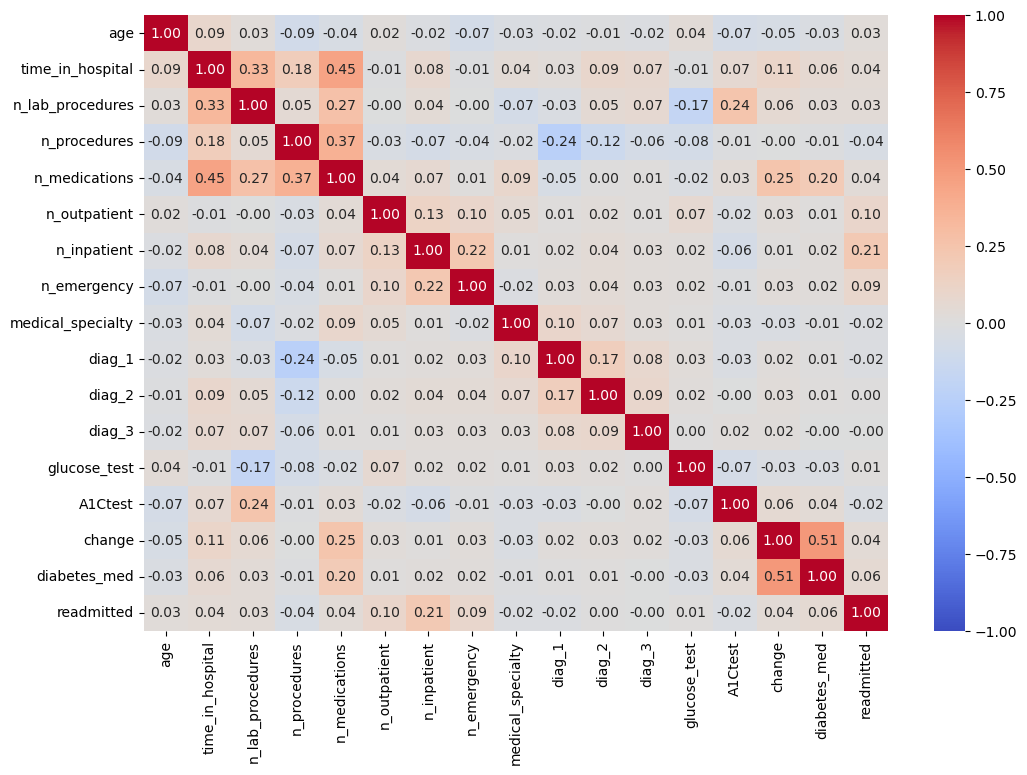

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt = ".2f",vmin = -1,vmax = 1)

In [45]:
#seperate the dependent and independent variables before scaling

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
#scale the dataset as it is a linear model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x)

In [49]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(X_standardized, i) for i in range(X_standardized.shape[1])]

# Display features with high VIF (typically > 5 or 10)
print(vif_data)
#if it his higher than 5 , it has high collinearity

              Feature       VIF
0                 age  1.046183
1    time_in_hospital  1.383359
2    n_lab_procedures  1.280633
3        n_procedures  1.304821
4       n_medications  1.588746
5        n_outpatient  1.034330
6         n_inpatient  1.088149
7         n_emergency  1.066686
8   medical_specialty  1.043490
9              diag_1  1.106376
10             diag_2  1.058933
11             diag_3  1.025183
12       glucose_test  1.049559
13            A1Ctest  1.083735
14             change  1.403930
15       diabetes_med  1.360400


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(solver='lbfgs', verbose=1)
model.fit(X_train, y_train)

LogisticRegression(verbose=1)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6056
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      2658
           1       0.62      0.40      0.49      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.59      0.58      5000
weighted avg       0.61      0.61      0.59      5000

Confusion Matrix:
 [[2084  574]
 [1398  944]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


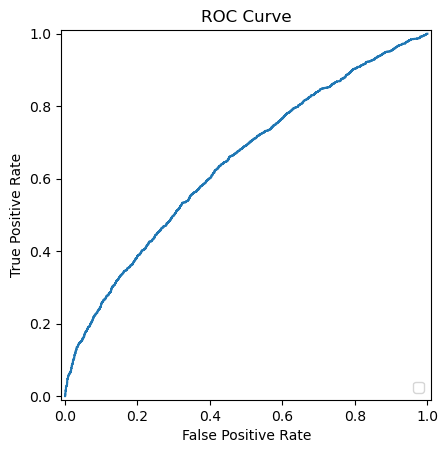

AUC score:0.64


In [55]:
from sklearn.metrics import roc_curve, RocCurveDisplay,auc
# Get predicted probabilities for the positive class (1)
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate the AUC score
roc_auc = auc(fpr, tpr)
#Using RocCurveDisplay from scikit-learn
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
plt.show()
print(f'AUC score:{roc_auc:.2f}')

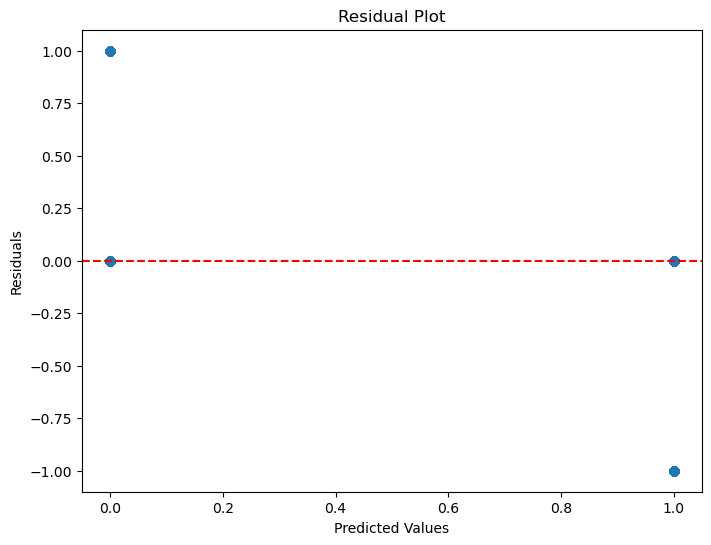

In [57]:
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') 
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

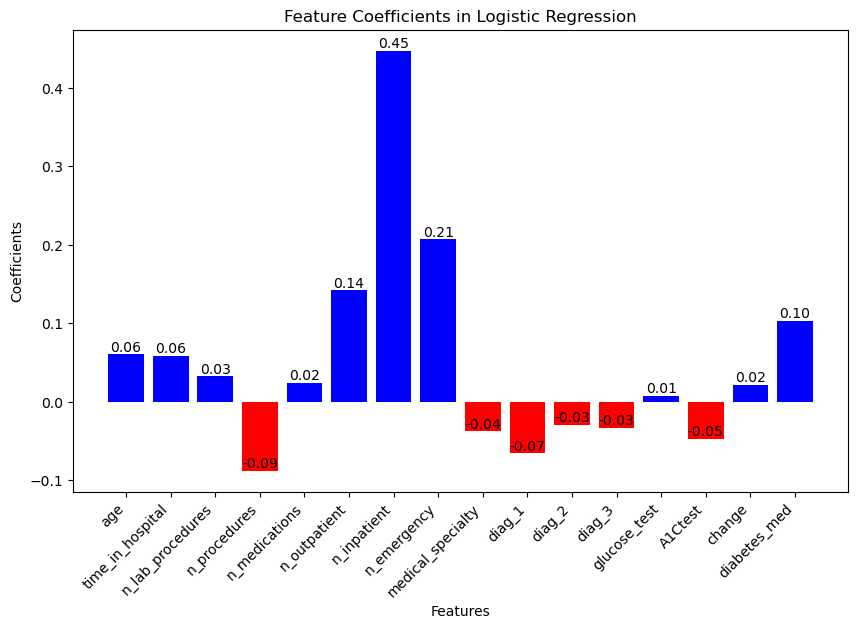

In [61]:
#Since the data residuals show some pattern and is not random around the zero, this linear model might not be the best fit for this problem

# Get the coefficients from the model
coefficients = model.coef_[0]
features = df.iloc[:,:-1].columns

# Create a bar chart of coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(features, coefficients, color=np.where(coefficients > 0, 'blue', 'red'))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients in Logistic Regression')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

In [63]:
def Sigmoid(x):
  a=[]
  for i in x:
    a.append(1/(1+np.exp(-i)))
  return a

In [66]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=10, n_jobs=-1, scoring='neg_log_loss'
)

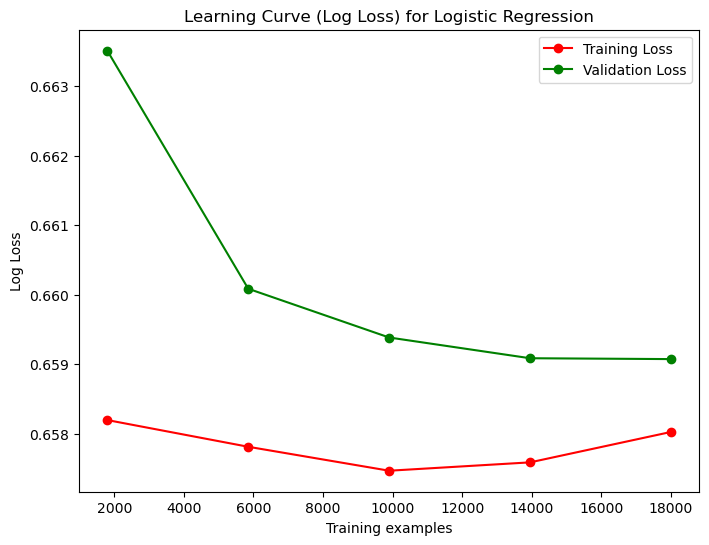

In [70]:
# Negate the scores to get positive log loss values
train_loss_mean = -np.mean(train_scores, axis=1)
test_loss_mean = -np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Validation Loss")


# Customize the plot
plt.title("Learning Curve (Log Loss) for Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Log Loss")
plt.legend(loc="best")
#plt.grid(True)
plt.show()



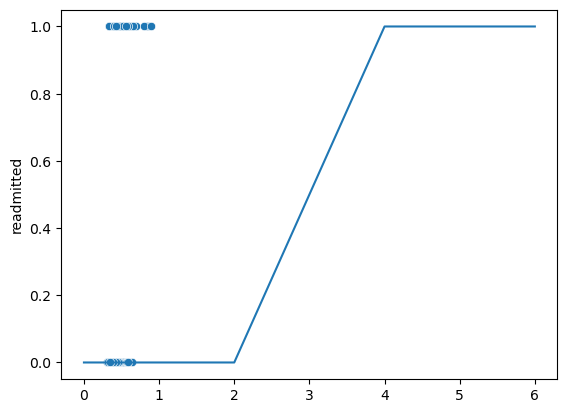

In [72]:
x_preds = model.predict_proba(X_test[:100])[:,1]
y_pred = y_test[:100]
#plot the sigmoid classification
sns.scatterplot(x=x_preds,y=y_pred)
x = np.linspace(-len(x_preds), len(x_preds),7) 
plt.plot(Sigmoid(x))